**OGFSC (Optimal Gene Filtering for Single Cell data)**

In [ ]:
!pip install scprep

     |████████████████████████████████| 102kB 3.9MB/s 


In [ ]:
import scprep
import numpy as np

Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data_uf = scprep.io.load_10X('/content/drive/MyDrive/test_10X/test_10X')

In [ ]:
data_uf.head()

,Arl8b,Cdc16,Lrrc8b,0610009B22Rik,Apoe,Asap1,Gstm5,Mok,Rps27l,Stap2,Prpf40a,Pam16,Rnf220,Tmem9b,Rdx,Nupr1l,4930455B14Rik,Sdf2l1,4921517D22Rik,Psmd8,Dynlrb2,Smco4,Gm14285,Ctdp1,Hnrnpu,Ldhb,Cep63,Unc50,Chd5,Ift22,Ankrd13a,Atp5o,Cdhr4,Atp1b3,Gm553,Phtf1,Fam177a,Dgkh,Atoh8,1700019G24Rik,...,Vmn1r118,Ccdc54,Megf6,Gm13872,Erp44,Rgs13,Slc2a3,Gm11116,Gm16279,Trmt1,Gm7697,Gm11579,Zdhhc20,4930444P10Rik,RP23-449M8.6,Gm12631,Stoml3,Metrn,Tmco5,Fabp12,Gm3486,Hnf1aos2,Tmem200b,Olfr91,Gm19273,Hmga1-rs1,Prl3d3,Crygf,D030040B21Rik,Serpinb9e,Fam126b,Gm26873,Gm42435,Dmxl2,Cep164,Kansl2,Mgat1,Thrsp,Gm20821,Olfr203
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GATGAGGCATTTCAGG-1,0.0,1.0,0.0,0.0,0.0,0.0,13.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GTCATTTCATCTCGCT-1,0.0,0.0,0.0,2.0,0.0,0.0,14.0,0.0,3.0,0.0,0.0,3.0,1.0,1.0,1.0,2.0,3.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CTGAAACAGCTTCGCG-1,3.0,1.0,2.0,1.0,0.0,1.0,62.0,4.0,6.0,0.0,1.0,12.0,3.0,3.0,6.0,13.0,2.0,1.0,0.0,6.0,8.0,3.0,1.0,3.0,4.0,0.0,5.0,0.0,1.0,1.0,2.0,5.0,2.0,2.0,2.0,0.0,2.0,4.0,2.0,4.0,...,0.0,7.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,8.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0
CTCGGAGGTCTCCACT-1,1.0,0.0,2.0,0.0,0.0,1.0,6.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGAGCTTAGCTGTTCA-1,0.0,1.0,2.0,4.0,0.0,1.0,54.0,2.0,2.0,0.0,3.0,5.0,1.0,0.0,3.0,6.0,5.0,1.0,0.0,7.0,3.0,3.0,0.0,5.0,1.0,0.0,4.0,0.0,0.0,2.0,2.0,6.0,3.0,1.0,0.0,3.0,6.0,2.0,6.0,4.0,...,0.0,2.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


Remove Empty Cells

In [ ]:
data_f = scprep.filter.remove_empty_cells(data_uf)

Original Data Plotting


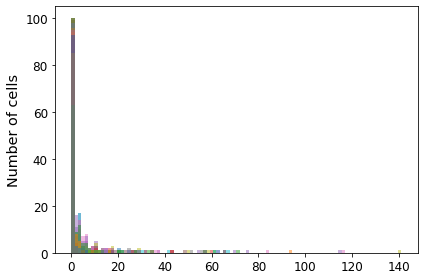

In [ ]:
scprep.plot.histogram(data_f)

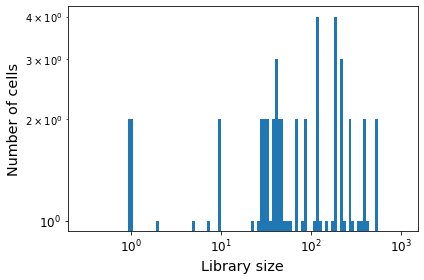

In [ ]:
scprep.plot.plot_library_size(data_f)

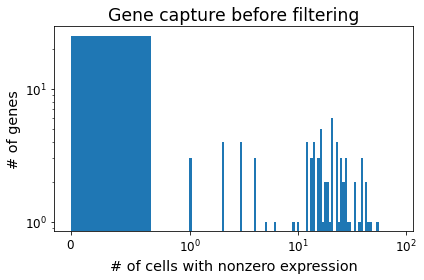

In [ ]:
scprep.plot.histogram(scprep.measure.gene_capture_count(data_f), log=True,
                      title="Gene capture before filtering",
                     xlabel='# of cells with nonzero expression',
                     ylabel='# of genes')

Filtering Duplicates

In [ ]:
data_remove_duplicate=scprep.filter.filter_duplicates(data_f)

In [ ]:
data_emp=scprep.filter.filter_empty_genes(data_f)

Gene Capture After Filtering with percentile=60

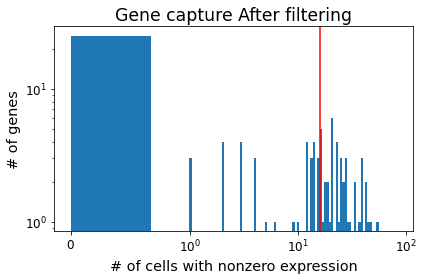

In [ ]:
scprep.plot.histogram(scprep.measure.gene_capture_count(data_f), percentile=60,
                      log=True,
                      title="Gene capture After filtering",
                     xlabel='# of cells with nonzero expression',
                     ylabel='# of genes')

Displaying Highly Variable Genes

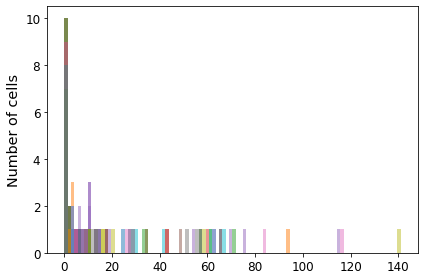

In [ ]:
data_hvg = scprep.select.highly_variable_genes(data_f, percentile=90)
scprep.plot.histogram(data_hvg)

Filtering Gene Expressions

In [ ]:
data_gene=scprep.filter.filter_gene_set_expression(data_f,percentile=50)

/usr/local/lib/python3.6/dist-packages/scprep/select.py:362: UserWarning: No selection conditions provided. Returning all columns.
  "No selection conditions provided. Returning all columns.", UserWarning


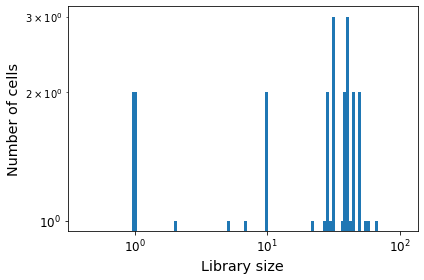

In [ ]:
scprep.plot.plot_library_size(data_gene)

The red line displays the threshold

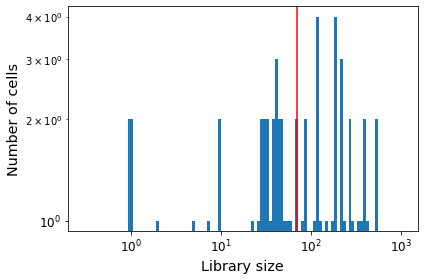

In [ ]:
scprep.plot.plot_library_size(data_f, percentile=50)

Filter Library Size

In [ ]:
data_filter = scprep.filter.filter_library_size(data_f, percentile=50, keep_cells='below')

Filtered dataset Visualisation


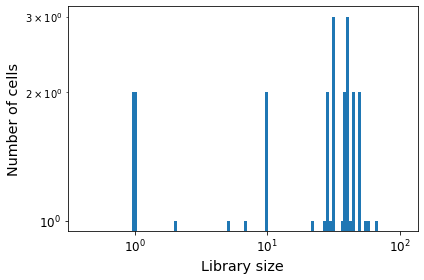

In [ ]:
scprep.plot.plot_library_size(data_filter)

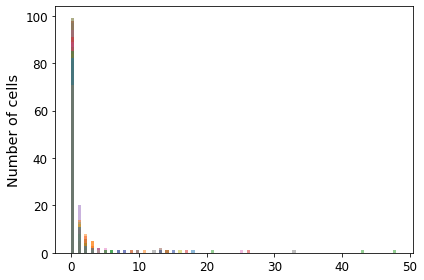

In [ ]:
scprep.plot.histogram(data_filter)

Remove Lowly Expressed Genes

In [ ]:
data_removeLEG = scprep.filter.remove_rare_genes(data_filter,min_cells=5)

Visualisation of Data After removing lowly expressed genes

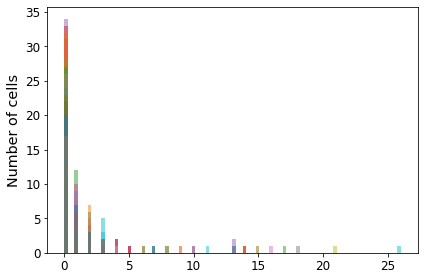

In [ ]:
scprep.plot.histogram(data_removeLEG)

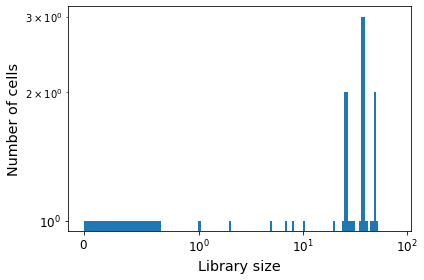

In [ ]:
scprep.plot.plot_library_size(data_removeLEG)

**VOOM**

Visualisation of the Normalised Library Size

In [ ]:
data_sq = scprep.transform.log(data_removeLEG, base=2)

In [ ]:
scprep.plot.histogram(data_sq)

In [ ]:
scprep.plot.plot_library_size(data_sq)

In [ ]:
data_ln = scprep.normalize.library_size_normalize(data_sq)

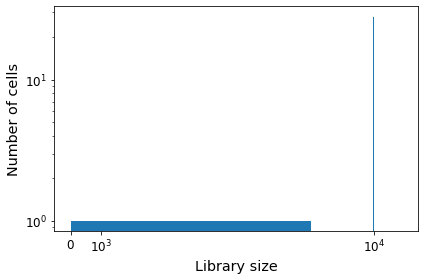

In [ ]:
scprep.plot.plot_library_size(data_ln)

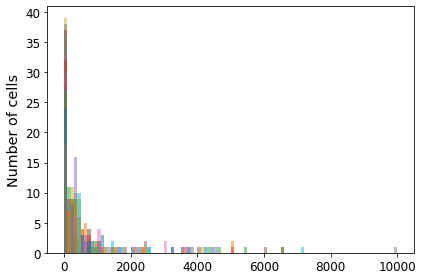

In [ ]:
scprep.plot.histogram(data_ln)

In [ ]:
!pip install scanpy

In [ ]:
import scanpy

Log2 Transformation of Data

Visualisation after Transforming the data

Visualisaing the Mean Variance Relationship Of Transformed Data




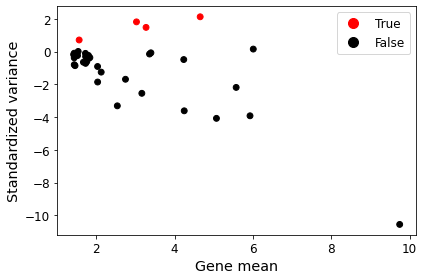

In [ ]:
scprep.plot.plot_gene_variability(data_sq)